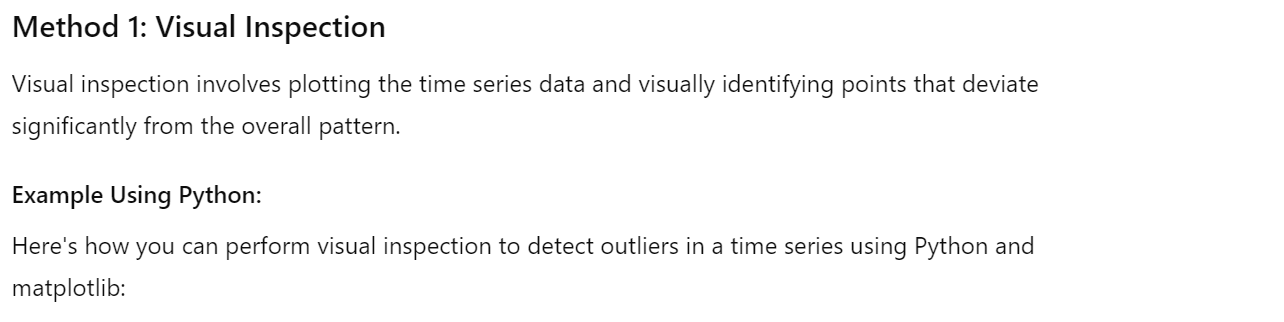

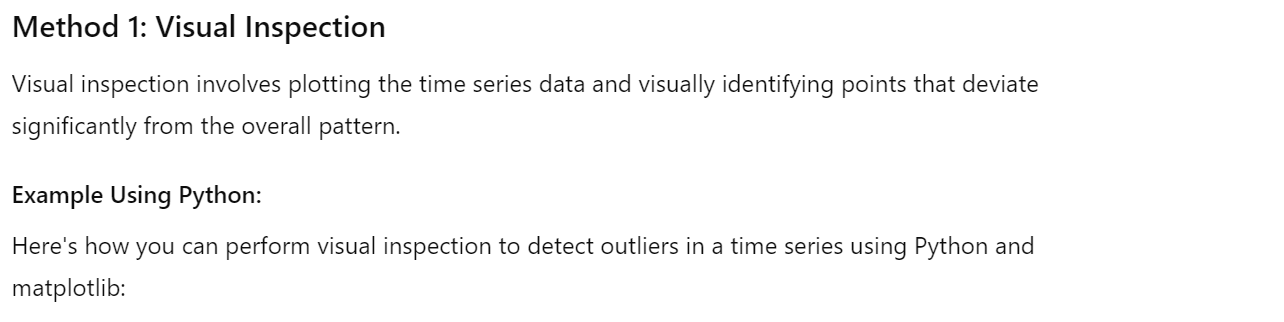

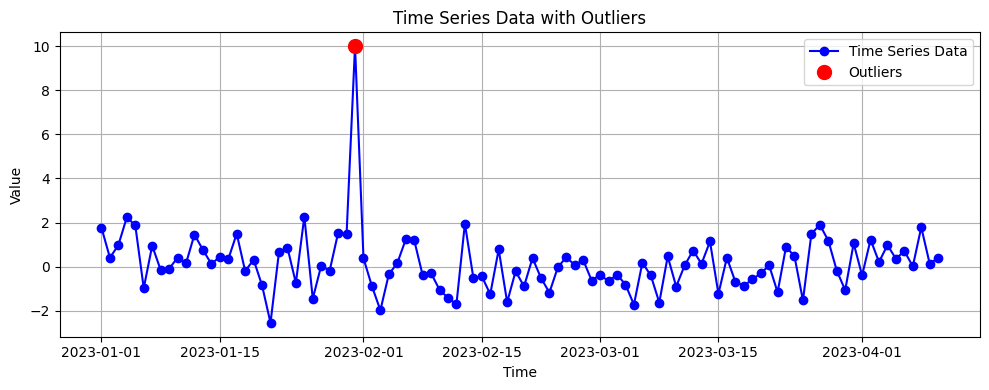

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate example time series data
np.random.seed(0)
n = 100
time_index = pd.date_range(start='2023-01-01', periods=n, freq='D')
time_series = np.random.randn(n)  # Example random time series data

# Introduce an outlier
time_series[30] = 10.0  # Insert an outlier at index 30

# Plot the time series data
plt.figure(figsize=(10, 4))
plt.plot(time_index, time_series, marker='o', linestyle='-', color='b', label='Time Series Data')

# Highlight outliers (points that are beyond a certain threshold)
outlier_threshold = 3.0  # Adjust as needed
outliers = np.abs(time_series) > outlier_threshold
plt.plot(time_index[outliers], time_series[outliers], 'ro', markersize=10, label='Outliers')

plt.title('Time Series Data with Outliers')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


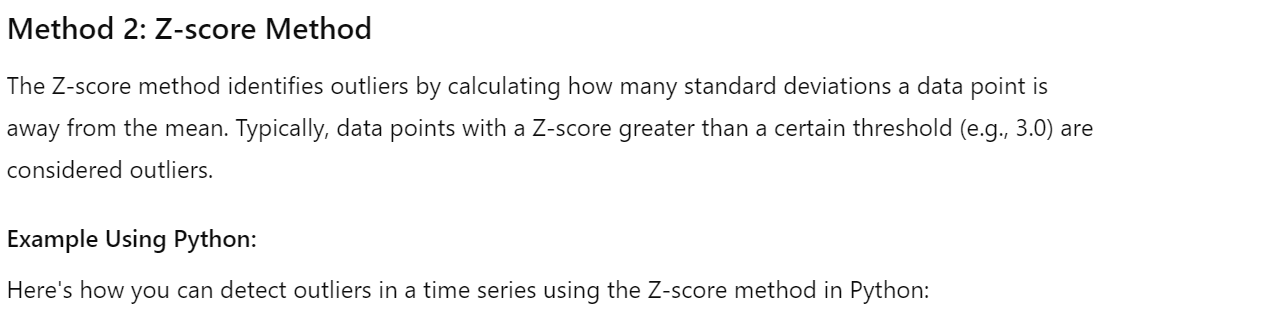

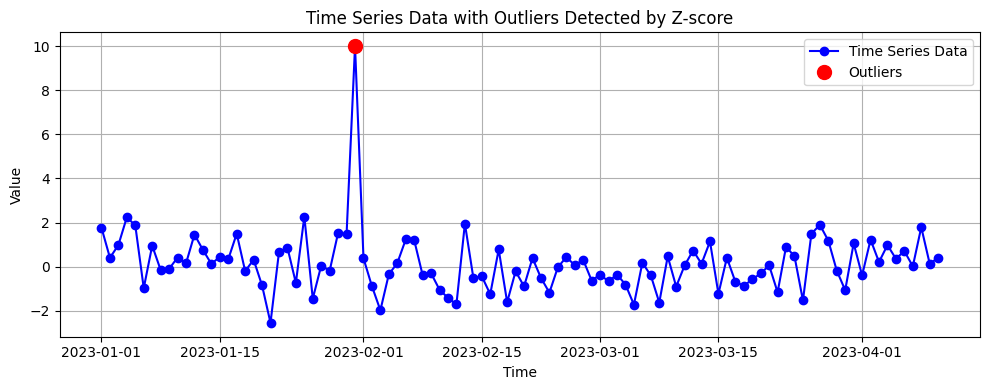

Indices of outliers detected by Z-score method:
[30]


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Generate example time series data
np.random.seed(0)
n = 100
time_index = pd.date_range(start='2023-01-01', periods=n, freq='D')
time_series = np.random.randn(n)  # Example random time series data

# Introduce an outlier
time_series[30] = 10.0  # Insert an outlier at index 30

# Calculate Z-score
z_scores = zscore(time_series)

# Define threshold for outliers (Z-score > 3.0)
outlier_threshold = 3.0
outliers = np.abs(z_scores) > outlier_threshold

# Plot the time series data
plt.figure(figsize=(10, 4))
plt.plot(time_index, time_series, marker='o', linestyle='-', color='b', label='Time Series Data')

# Highlight outliers
plt.plot(time_index[outliers], time_series[outliers], 'ro', markersize=10, label='Outliers')

plt.title('Time Series Data with Outliers Detected by Z-score')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print indices of detected outliers
print("Indices of outliers detected by Z-score method:")
print(np.where(outliers)[0])


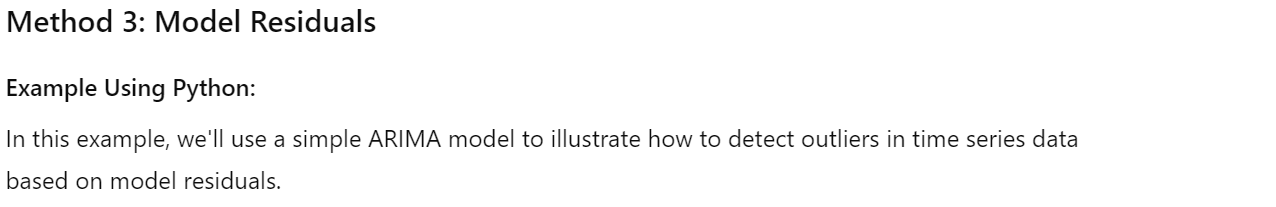

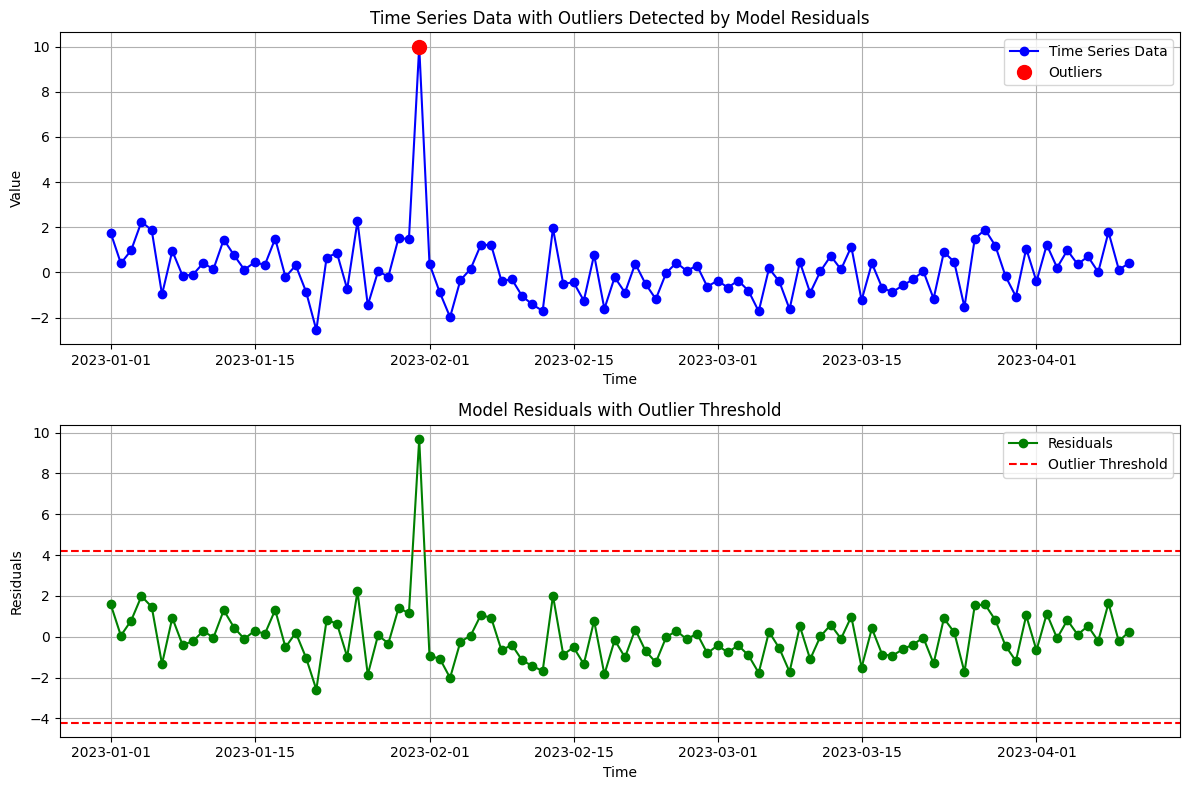

Indices of outliers detected by Model Residuals method:
[30]


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Generate example time series data
np.random.seed(0)
n = 100
time_index = pd.date_range(start='2023-01-01', periods=n, freq='D')
time_series = np.random.randn(n)  # Example random time series data

# Introduce an outlier
time_series[30] = 10.0  # Insert an outlier at index 30

# Fit ARIMA model (example: ARIMA(1,0,0))
model = ARIMA(time_series, order=(1, 0, 0))
model_fit = model.fit()

# Get residuals
residuals = model_fit.resid

# Calculate outlier threshold (e.g., 3 standard deviations)
outlier_threshold = 3.0 * np.std(residuals)

# Identify outliers based on residuals
outliers = np.abs(residuals) > outlier_threshold

# Plot time series data and residuals
plt.figure(figsize=(12, 8))

# Plot time series data
plt.subplot(2, 1, 1)
plt.plot(time_index, time_series, marker='o', linestyle='-', color='b', label='Time Series Data')
plt.plot(time_index[outliers], time_series[outliers], 'ro', markersize=10, label='Outliers')
plt.title('Time Series Data with Outliers Detected by Model Residuals')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# Plot residuals
plt.subplot(2, 1, 2)
plt.plot(time_index, residuals, marker='o', linestyle='-', color='g', label='Residuals')
plt.axhline(y=outlier_threshold, color='r', linestyle='--', label='Outlier Threshold')
plt.axhline(y=-outlier_threshold, color='r', linestyle='--')
plt.title('Model Residuals with Outlier Threshold')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print indices of detected outliers
print("Indices of outliers detected by Model Residuals method:")
print(np.where(outliers)[0])


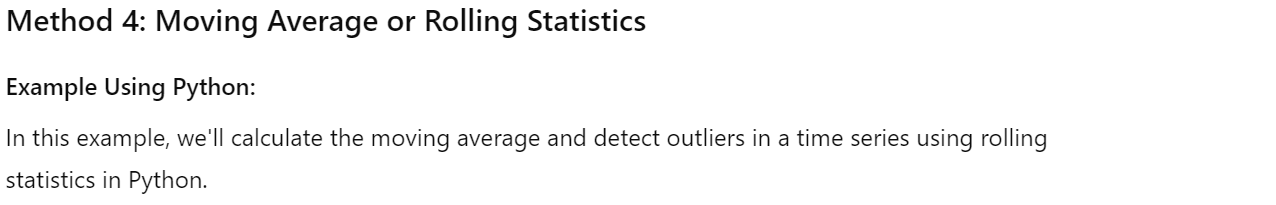

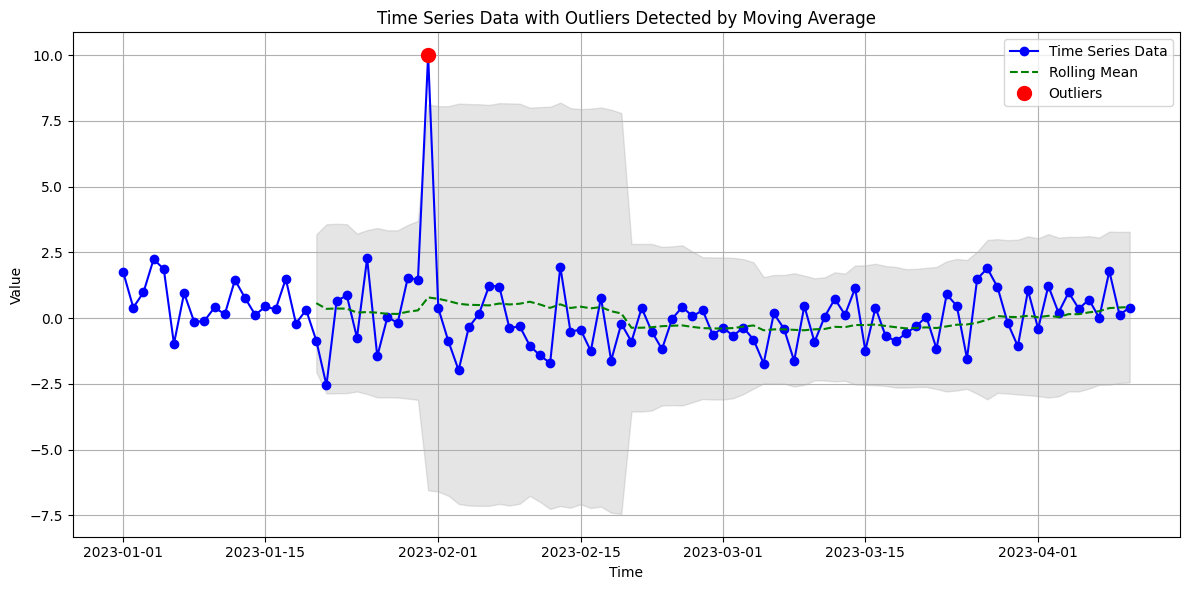

Indices of outliers detected by Moving Average method:
[30]


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate example time series data
np.random.seed(0)
n = 100
time_index = pd.date_range(start='2023-01-01', periods=n, freq='D')
time_series = np.random.randn(n)  # Example random time series data

# Introduce an outlier
time_series[30] = 10.0  # Insert an outlier at index 30

# Convert time_series to a pandas Series
time_series = pd.Series(time_series, index=time_index)

# Calculate rolling mean and standard deviation
window_size = 20  # Window size for rolling statistics
rolling_mean = time_series.rolling(window=window_size).mean()
rolling_std = time_series.rolling(window=window_size).std()

# Define outlier threshold (e.g., 3 standard deviations from rolling mean)
outlier_threshold = 3.0 * rolling_std

# Identify outliers based on rolling statistics
outliers = np.abs(time_series - rolling_mean) > outlier_threshold

# Plot time series data and rolling statistics
plt.figure(figsize=(12, 6))

# Plot time series data
plt.plot(time_index, time_series, marker='o', linestyle='-', color='b', label='Time Series Data')

# Plot rolling mean and outliers
plt.plot(rolling_mean.index, rolling_mean, linestyle='--', color='g', label='Rolling Mean')
plt.plot(time_index[outliers], time_series[outliers], 'ro', markersize=10, label='Outliers')

# Fill between upper and lower bounds of outlier threshold for visualization
plt.fill_between(time_index, rolling_mean - outlier_threshold, rolling_mean + outlier_threshold, color='gray', alpha=0.2)

plt.title('Time Series Data with Outliers Detected by Moving Average')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print indices of detected outliers
print("Indices of outliers detected by Moving Average method:")
print(np.where(outliers)[0])


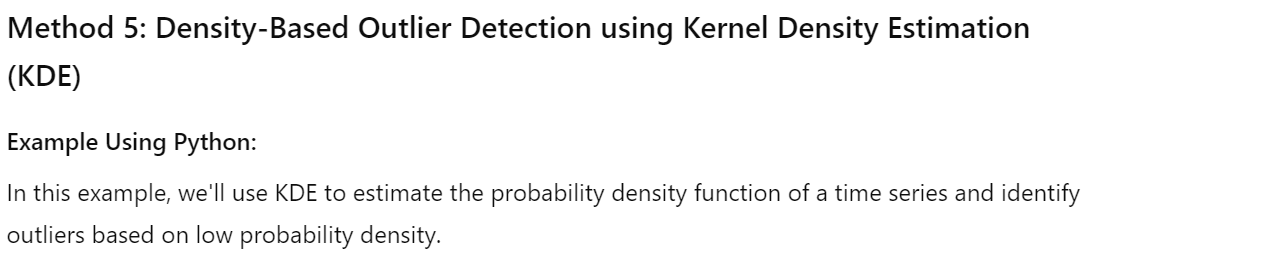

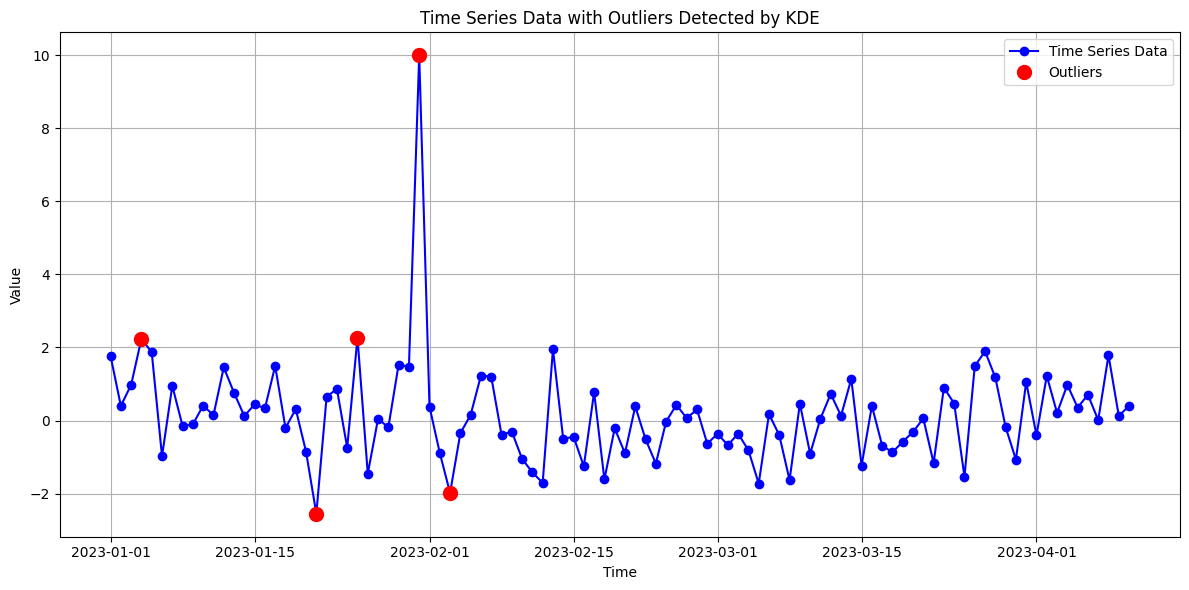

Indices of outliers detected by KDE method:
[ 3 20 24 30 33]


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Generate example time series data
np.random.seed(0)
n = 100
time_index = pd.date_range(start='2023-01-01', periods=n, freq='D')
time_series = np.random.randn(n)  # Example random time series data

# Introduce an outlier
time_series[30] = 10.0  # Insert an outlier at index 30

# KDE estimation
kde = gaussian_kde(time_series)

# Evaluate KDE at each data point
kde_values = kde(time_series)

# Define outlier threshold (e.g., lowest 5% KDE values)
percentile_threshold = 5
threshold = np.percentile(kde_values, percentile_threshold)

# Identify outliers based on KDE values
outliers = time_series[kde_values < threshold]

# Plot time series data and KDE
plt.figure(figsize=(12, 6))

# Plot time series data
plt.plot(time_index, time_series, marker='o', linestyle='-', color='b', label='Time Series Data')

# Highlight outliers
plt.plot(time_index[np.isin(time_series, outliers)], outliers, 'ro', markersize=10, label='Outliers')

plt.title('Time Series Data with Outliers Detected by KDE')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print indices of detected outliers
print("Indices of outliers detected by KDE method:")
print(np.where(np.isin(time_series, outliers))[0])
